In [224]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set()

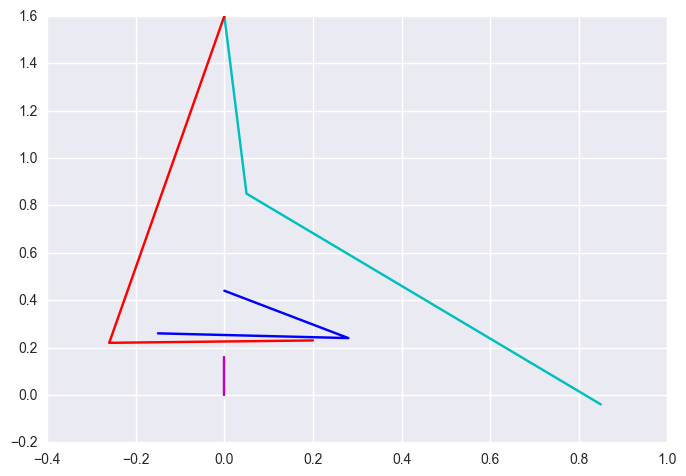

In [225]:
f1 = [
    [0., 0.],
    [0., .16]
]
f2 = [
      [.85, -.04],
    [.05, .85],
    [0., 1.6]
]
f3 = [
    [.2, .23],
    [-.26, .22],
    [0., 1.6]
]
f4 = [
    [-.15, .26],
    [.28, .24],
    [0., .44]
]
plt.plot(*zip(*f1), color='m')
plt.plot(*zip(*f2), color='c')
plt.plot(*zip(*f3), color='r')
plt.plot(*zip(*f4), color='b')

In [226]:
import numpy as np
import numpy.random as npr

In [230]:
class Affine(object):
    def __init__(self, A, b):
        A = np.array(A)
        b = np.array(b)
        print A, b
        assert A.shape == (2,2)
        assert b.shape == (2,)
        self.A = A
        self.b = b
        
    def __call__(self, xy):
        return np.matmul(self.A, xy) + self.b
        
    @property
    def fixed_point(self):
        a,b,c,d = self.A[0,0], self.A[0,1], self.A[1,0], self.A[1,1]
        e,f = self.b[0], self.b[1]
        x = b*f/((1.-a)*(1.-d) - b*c) + e/(1.-a-b*c/(1.-d))
        y = c*e/((1.-a)*(1.-d) - b*c) + f/(1.-d-b*c/(1.-a))
        return (x,y)
    
    @property
    def plt_triangle(self):
        return ([self.A[0,0], self.A[0,1], self.b[0], self.A[0,0]],
                [self.A[1,0], self.A[1,1], self.b[1], self.A[1,0]])
    
class IFS(object):
    def __init__(self, affines, ps):
        self.affines = affines
        self.ps = ps
        
    def chaos_game(self, n_iter, xy0=None):
        xy = xy0 if xy0 is not None else npr.rand(2)
        points = [tuple(xy)]
        for f in npr.choice(self.affines, n_iter, p=self.ps, replace=True):
            xy = f(xy)
            points.append(tuple(xy))
        return points

In [231]:
f1 = Affine([[0.,0.],[0.,.16]], [0.,0.])
f2 = Affine([[.85,.04],[-.04,.85]], [0.,1.6])
f3 = Affine([[.2,-.26],[.23,.22]], [0.,1.6])
f4 = Affine([[-.15,.28],[.26,.24]], [0.,.44])

fern = IFS([f1, f2, f3, f4], [.01, .85, .07, .07])

[[ 0.    0.  ]
 [ 0.    0.16]] [ 0.  0.]
[[ 0.85  0.04]
 [-0.04  0.85]] [ 0.   1.6]
[[ 0.2  -0.26]
 [ 0.23  0.22]] [ 0.   1.6]
[[-0.15  0.28]
 [ 0.26  0.24]] [ 0.    0.44]


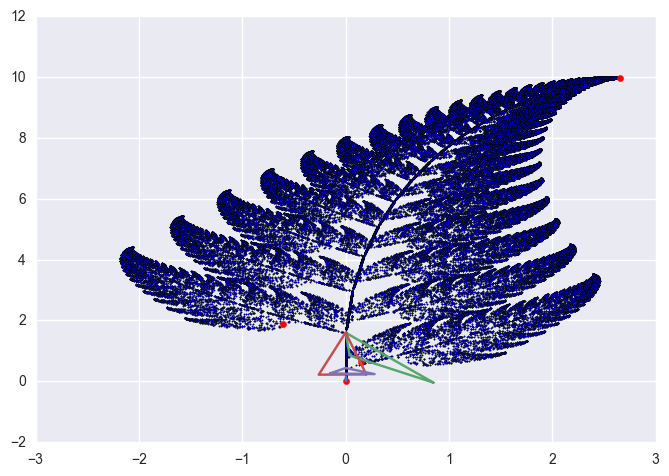

In [232]:
plt.plot(*f1.plt_triangle)
plt.plot(*f2.plt_triangle)
plt.plot(*f3.plt_triangle)
plt.plot(*f4.plt_triangle)
plt.scatter(*zip(*fern.chaos_game(10000, (0.,0.))),s=1)
plt.scatter(*zip(*[f1.fixed_point, f2.fixed_point, f3.fixed_point, f4.fixed_point]), color='r')

In [215]:
f1 = Affine([[.5,0.],[0.,.5]], [.5,0.])
f2 = Affine([[.5,0.],[0.,.5]], [-.5,0.])
f3 = Affine([[.5,0.],[0.,.5]], [0.,.75])

serpinksi = IFS([f1, f2, f3], [.33, .33, .34])

[[ 0.5  0. ]
 [ 0.   0.5]] [ 0.5  0. ]
[[ 0.5  0. ]
 [ 0.   0.5]] [-0.5  0. ]
[[ 0.5  0. ]
 [ 0.   0.5]] [ 0.    0.75]


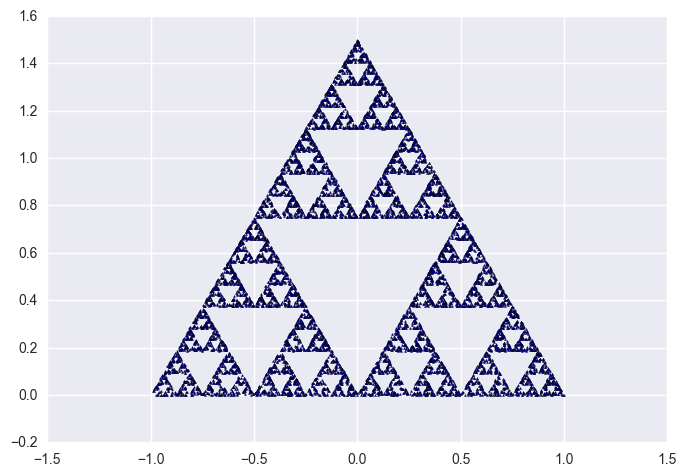

In [197]:
plt.scatter(*zip(*serpinksi.chaos_game(10000, (0,0))), s=2, marker='^')